In [16]:
#load library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import confusion_matrix 
from sklearn.pipeline import Pipeline 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import MultinomialNB 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 


In [19]:
#load dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'
hepatitisDataset = pd.read_csv(url, header=None)
df=pd.read_csv(url, header=None)

In [20]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
1,phon_R01_S01_1,119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.03300,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
2,phon_R01_S01_2,122.40000,148.65000,113.81900,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.08500,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
3,phon_R01_S01_3,116.68200,131.11100,111.55500,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.65100,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
4,phon_R01_S01_4,116.67600,137.87100,111.36600,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.64400,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975


In [4]:
#memberi nama header atribut
df.columns = ['Class', 'fitur 1', 'fitur 2', 'fitur 3', 'fitur 4', 'fitur 5', 'fitur 6', 'fitur 7', 'fitur 8', 'fitur 9', 
              'fitur 10', 'fitur 11', 'fitur 12', 'fitur 13', 'fitur 14', 'fitur 15', 'fitur 16', 'fitur 17', 'fitur 18',
              'fitur 19', 'fitur 20', 'fitur 21', 'fitur 22', 'fitur 23']

In [5]:
df.head()

,Class,fitur 1,fitur 2,fitur 3,fitur 4,fitur 5,fitur 6,fitur 7,fitur 8,fitur 9,...,fitur 14,fitur 15,fitur 16,fitur 17,fitur 18,fitur 19,fitur 20,fitur 21,fitur 22,fitur 23
0,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
1,phon_R01_S01_1,119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.03300,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
2,phon_R01_S01_2,122.40000,148.65000,113.81900,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.08500,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
3,phon_R01_S01_3,116.68200,131.11100,111.55500,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.65100,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
4,phon_R01_S01_4,116.67600,137.87100,111.36600,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.64400,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975


In [6]:
#menganalisa tipe dan relasi data
#melihat tipe dataset
type(df)

pandas.core.frame.DataFrame

In [7]:
#melihat ukuran dataset
df.shape

(196, 24)

In [8]:
#melihat informasi tipe data semua kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     196 non-null    object
 1   fitur 1   196 non-null    object
 2   fitur 2   196 non-null    object
 3   fitur 3   196 non-null    object
 4   fitur 4   196 non-null    object
 5   fitur 5   196 non-null    object
 6   fitur 6   196 non-null    object
 7   fitur 7   196 non-null    object
 8   fitur 8   196 non-null    object
 9   fitur 9   196 non-null    object
 10  fitur 10  196 non-null    object
 11  fitur 11  196 non-null    object
 12  fitur 12  196 non-null    object
 13  fitur 13  196 non-null    object
 14  fitur 14  196 non-null    object
 15  fitur 15  196 non-null    object
 16  fitur 16  196 non-null    object
 17  fitur 17  196 non-null    object
 18  fitur 18  196 non-null    object
 19  fitur 19  196 non-null    object
 20  fitur 20  196 non-null    object
 21  fitur 21  196 no

In [9]:
#melihat distribusi Class (apa saja jenisnya)
df['Class'].unique()

array(['name', 'phon_R01_S01_1', 'phon_R01_S01_2', 'phon_R01_S01_3',
       'phon_R01_S01_4', 'phon_R01_S01_5', 'phon_R01_S01_6',
       'phon_R01_S02_1', 'phon_R01_S02_2', 'phon_R01_S02_3',
       'phon_R01_S02_4', 'phon_R01_S02_5', 'phon_R01_S02_6',
       'phon_R01_S04_1', 'phon_R01_S04_2', 'phon_R01_S04_3',
       'phon_R01_S04_4', 'phon_R01_S04_5', 'phon_R01_S04_6',
       'phon_R01_S05_1', 'phon_R01_S05_2', 'phon_R01_S05_3',
       'phon_R01_S05_4', 'phon_R01_S05_5', 'phon_R01_S05_6',
       'phon_R01_S06_1', 'phon_R01_S06_2', 'phon_R01_S06_3',
       'phon_R01_S06_4', 'phon_R01_S06_5', 'phon_R01_S06_6',
       'phon_R01_S07_1', 'phon_R01_S07_2', 'phon_R01_S07_3',
       'phon_R01_S07_4', 'phon_R01_S07_5', 'phon_R01_S07_6',
       'phon_R01_S08_1', 'phon_R01_S08_2', 'phon_R01_S08_3',
       'phon_R01_S08_4', 'phon_R01_S08_5', 'phon_R01_S08_6',
       'phon_R01_S10_1', 'phon_R01_S10_2', 'phon_R01_S10_3',
       'phon_R01_S10_4', 'phon_R01_S10_5', 'phon_R01_S10_6',
       'phon_R01

In [10]:
#melihat distribusi kelas (ntuk jumlah tiap class)
df['Class'].value_counts()

name              1
phon_R01_S31_1    1
phon_R01_S31_3    1
phon_R01_S31_4    1
phon_R01_S31_5    1
                 ..
phon_R01_S18_1    1
phon_R01_S18_2    1
phon_R01_S18_3    1
phon_R01_S18_4    1
phon_R01_S50_6    1
Name: Class, Length: 196, dtype: int64

Text(0.5, 1.02, 'Distribusi')

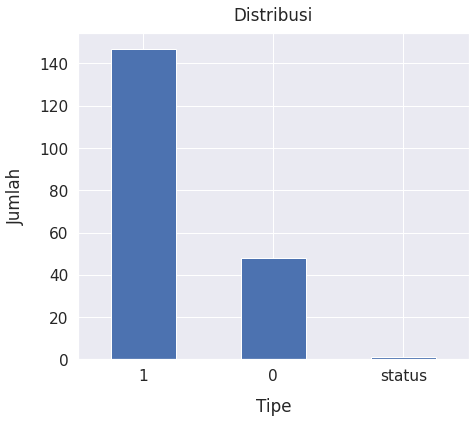

In [12]:
#melihat distribusi class (visualisasi diagram)
sns.set(font_scale=1.4)
df['fitur 17'].value_counts().plot(kind='bar',figsize=(7,6), rot=0)
plt.xlabel("Tipe", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi", y=1.02)

In [ ]:
#melihat deskripsi 
df.describe()

,Class,AGE,fitur 1,fitur 3,fitur 18
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.845161,1.451613
std,0.406070,12.565878,0.305240,0.362923,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000
25%,2.000000,32.000000,1.000000,2.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000


In [ ]:
#cek dataframe
df.head()

,Class,AGE,fitur 1,fitur 2,fitur 3,fitur 4,fitur 5,fitur 6,fitur 7,fitur 8,fitur 9,fitur 10,fitur 11,fitur 12,fitur 13,fitur 14,fitur 15,fitur 16,fitur 17,fitur 18
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [ ]:
#merubah nilai ? menjadi NaN dengan numpy
df.replace("?", np.nan, inplace=True)

In [ ]:
df.head()

,Class,AGE,fitur 1,fitur 2,fitur 3,fitur 4,fitur 5,fitur 6,fitur 7,fitur 8,fitur 9,fitur 10,fitur 11,fitur 12,fitur 13,fitur 14,fitur 15,fitur 16,fitur 17,fitur 18
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,NaN,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,NaN,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,NaN,1
3,2,31,1,NaN,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,NaN,200,4.0,NaN,1


In [ ]:
#cek dataframe ada nilai kosong
df.isnull().values.any()

True

In [ ]:
#lihat lokasi nilai kosong
df.loc[:, df.isnull().any()].columns

Index(['fitur 2', 'fitur 4', 'fitur 5', 'fitur 6', 'fitur 7', 'fitur 8',
       'fitur 9', 'fitur 10', 'fitur 11', 'fitur 12', 'fitur 13', 'fitur 14',
       'fitur 15', 'fitur 16', 'fitur 17'],
      dtype='object')

In [ ]:
#melihat presentase nilai kosong
df.loc[:, list(df.loc[:, df.isnull().any()].columns)].isnull().sum()/(len(df))*100

fitur 2      0.645161
fitur 4      0.645161
fitur 5      0.645161
fitur 6      0.645161
fitur 7      6.451613
fitur 8      7.096774
fitur 9      3.225806
fitur 10     3.225806
fitur 11     3.225806
fitur 12     3.225806
fitur 13     3.870968
fitur 14    18.709677
fitur 15     2.580645
fitur 16    10.322581
fitur 17    43.225806
dtype: float64

In [ ]:
#replace missing value untuk fitur yang kosong
df[['fitur 2', 'fitur 4', 'fitur 5', 'fitur 6', 'fitur 7', 'fitur 8', 'fitur 9', 'fitur 10', 
    'fitur 11', 'fitur 12', 'fitur 13', 'fitur 14', 'fitur 15', 'fitur 16', 'fitur 17']]

,fitur 2,fitur 4,fitur 5,fitur 6,fitur 7,fitur 8,fitur 9,fitur 10,fitur 11,fitur 12,fitur 13,fitur 14,fitur 15,fitur 16,fitur 17
0,1,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,NaN
1,1,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,NaN
2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,NaN
3,NaN,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80
4,2,2,2,2,2,2,2,2,2,2,1.00,NaN,200,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2,1,1,1,2,2,2,1,1,1,7.60,NaN,242,3.3,50
151,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,NaN
152,1,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,NaN
153,1,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48


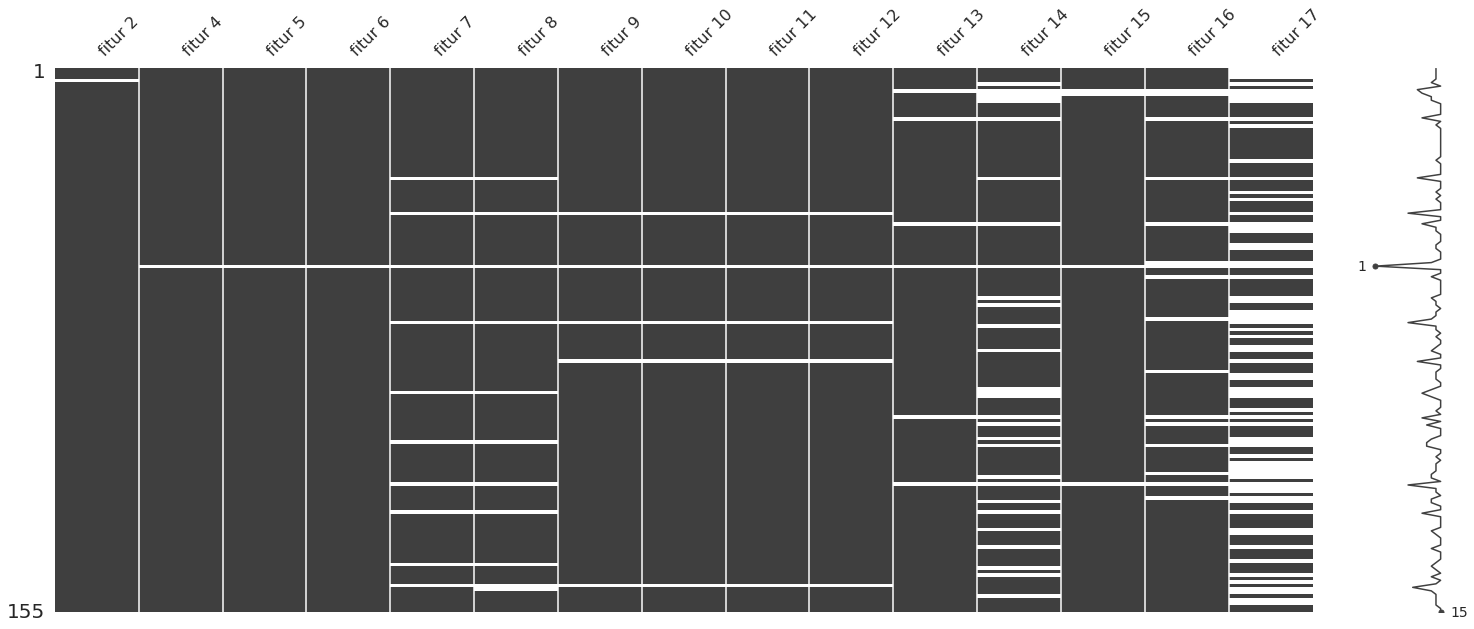

In [ ]:
#memperbaiki nilai yang hilang
missingdata_df=df.columns[df.isnull().any()].tolist()
missingno.matrix(df[missingdata_df])

In [ ]:
# Memperbaiki nilai yang hilang dengan nilai rata-rata (median) => fillna : untuk mengisi nilai yang kosong median_value = df['fitur 4'].median() 
median_value = df['fitur 2'].median() 
df['fitur 2']=df['fitur 2'].fillna(median_value)


In [ ]:
# Memperbaiki nilai yang hilang dengan nilai rata-rata (median) => fillna : untuk mengisi nilai yang kosong median_value = df['fitur 4'].median() 
median_value = df['fitur 4'].median() 
df['fitur 4']=df['fitur 4'].fillna(median_value)


In [ ]:
# Memperbaiki nilai yang hilang dengan nilai rata-rata (median) => fillna : untuk mengisi nilai yang kosong median_value = df['fitur 4'].median() 
median_value = df['fitur 5'].median() 
df['fitur 5']=df['fitur 5'].fillna(median_value)


In [ ]:
# Memperbaiki nilai yang hilang dengan nilai rata-rata (median) => fillna : untuk mengisi nilai yang kosong median_value = df['fitur 4'].median() 
median_value = df['fitur 6'].median() 
df['fitur 6']=df['fitur 6'].fillna(median_value)


In [ ]:
# Memperbaiki nilai yang hilang dengan nilai rata-rata (median) => fillna : untuk mengisi nilai yang kosong median_value = df['fitur 4'].median() 
median_value = df['fitur 7'].median() 
df['fitur 7']=df['fitur 7'].fillna(median_value)


In [ ]:
# Memperbaiki nilai yang hilang dengan nilai rata-rata (median) => fillna : untuk mengisi nilai yang kosong median_value = df['fitur 4'].median() 
median_value = df['fitur 8'].median() 
df['fitur 8']=df['fitur 8'].fillna(median_value)


In [ ]:
# Memperbaiki nilai yang hilang dengan nilai rata-rata (median) => fillna : untuk mengisi nilai yang kosong median_value = df['fitur 4'].median() 
median_value = df['fitur 9'].median() 
df['fitur 9']=df['fitur 9'].fillna(median_value)


In [ ]:
# Memperbaiki nilai yang hilang dengan nilai rata-rata (median) => fillna : untuk mengisi nilai yang kosong median_value = df['fitur 4'].median() 
median_value = df['fitur 10'].median() 
df['fitur 10']=df['fitur 10'].fillna(median_value)


In [ ]:
# Memperbaiki nilai yang hilang dengan nilai rata-rata (median) => fillna : untuk mengisi nilai yang kosong median_value = df['fitur 4'].median() 
median_value = df['fitur 11'].median() 
df['fitur 11']=df['fitur 11'].fillna(median_value)


In [ ]:
# Memperbaiki nilai yang hilang dengan nilai rata-rata (median) => fillna : untuk mengisi nilai yang kosong median_value = df['fitur 4'].median() 
median_value = df['fitur 12'].median() 
df['fitur 12']=df['fitur 12'].fillna(median_value)


In [ ]:
# Memperbaiki nilai yang hilang dengan nilai rata-rata (median) => fillna : untuk mengisi nilai yang kosong median_value = df['fitur 4'].median() 
median_value = df['fitur 13'].median() 
df['fitur 13']=df['fitur 13'].fillna(median_value)


In [ ]:
# Memperbaiki nilai yang hilang dengan nilai rata-rata (median) => fillna : untuk mengisi nilai yang kosong median_value = df['fitur 4'].median() 
median_value = df['fitur 14'].median() 
df['fitur 14']=df['fitur 14'].fillna(median_value)


In [ ]:
# Memperbaiki nilai yang hilang dengan nilai rata-rata (median) => fillna : untuk mengisi nilai yang kosong median_value = df['fitur 4'].median() 
median_value = df['fitur 15'].median() 
df['fitur 15']=df['fitur 15'].fillna(median_value)


In [ ]:
# Memperbaiki nilai yang hilang dengan nilai rata-rata (median) => fillna : untuk mengisi nilai yang kosong median_value = df['fitur 4'].median() 
median_value = df['fitur 16'].median() 
df['fitur 16']=df['fitur 16'].fillna(median_value)


In [ ]:
# Memperbaiki nilai yang hilang dengan nilai rata-rata (median) => fillna : untuk mengisi nilai yang kosong median_value = df['fitur 4'].median() 
median_value = df['fitur 17'].median() 
df['fitur 17']=df['fitur 17'].fillna(median_value)


In [ ]:
# Melihat kembali prosentasi dari nilai kosong (NaN) untuk fitur 4 dan fitur 38 setelah dibersihkan 
df.loc[:,list(df.loc[:,df.isnull().any()].columns)].isnull().sum()/(len(df))*100 


Series([], dtype: float64)

In [ ]:
# Menghapus Data Duplikat 
# Melihat ukuran baris dan kolom dataframe 
df.shape 


(155, 20)

In [ ]:
# Menghapus Data Duplikat dan melihat kembali ukuran baris & kolom dataframe 
df = df.drop_duplicates() 
df.shape 


(155, 20)

In [ ]:
# Menghapus fitur yang bernilai konstant 
df = df.loc[:, df.apply(pd.Series.nunique) !=1] 

In [ ]:
df.shape

(155, 20)

In [ ]:
# Mengecek Representasi Fitur 
df.info() 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     155 non-null    int64 
 1   AGE       155 non-null    int64 
 2   fitur 1   155 non-null    int64 
 3   fitur 2   155 non-null    object
 4   fitur 3   155 non-null    int64 
 5   fitur 4   155 non-null    object
 6   fitur 5   155 non-null    object
 7   fitur 6   155 non-null    object
 8   fitur 7   155 non-null    object
 9   fitur 8   155 non-null    object
 10  fitur 9   155 non-null    object
 11  fitur 10  155 non-null    object
 12  fitur 11  155 non-null    object
 13  fitur 12  155 non-null    object
 14  fitur 13  155 non-null    object
 15  fitur 14  155 non-null    object
 16  fitur 15  155 non-null    object
 17  fitur 16  155 non-null    object
 18  fitur 17  155 non-null    object
 19  fitur 18  155 non-null    int64 
dtypes: int64(5), object(15)
memory usage: 25.4+ KB


In [ ]:
# Mengubah yang tipe Object menjadi int64 
df["fitur 2"] = df["fitur 2"].astype('int64') 
df["fitur 4"] = df["fitur 4"].astype('int64') 
df["fitur 5"] = df["fitur 5"].astype('int64') 
df["fitur 6"] = df["fitur 6"].astype('int64') 
df["fitur 7"] = df["fitur 7"].astype('int64') 
df["fitur 8"] = df["fitur 8"].astype('int64') 
df["fitur 9"] = df["fitur 9"].astype('int64') 
df["fitur 10"] = df["fitur 10"].astype('int64') 
df["fitur 11"] = df["fitur 11"].astype('int64') 
df["fitur 12"] = df["fitur 12"].astype('int64') 
df["fitur 13"] = df["fitur 13"].astype('float64') 
df["fitur 14"] = df["fitur 14"].astype('int64') 
df["fitur 15"] = df["fitur 15"].astype('int64') 
df["fitur 16"] = df["fitur 16"].astype('float64') 
df["fitur 17"] = df["fitur 17"].astype('int64') 

In [ ]:
# Cek kembali Representasi Fitur 
df.info() 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Class     155 non-null    int64  
 1   AGE       155 non-null    int64  
 2   fitur 1   155 non-null    int64  
 3   fitur 2   155 non-null    int64  
 4   fitur 3   155 non-null    int64  
 5   fitur 4   155 non-null    int64  
 6   fitur 5   155 non-null    int64  
 7   fitur 6   155 non-null    int64  
 8   fitur 7   155 non-null    int64  
 9   fitur 8   155 non-null    int64  
 10  fitur 9   155 non-null    int64  
 11  fitur 10  155 non-null    int64  
 12  fitur 11  155 non-null    int64  
 13  fitur 12  155 non-null    int64  
 14  fitur 13  155 non-null    float64
 15  fitur 14  155 non-null    int64  
 16  fitur 15  155 non-null    int64  
 17  fitur 16  155 non-null    float64
 18  fitur 17  155 non-null    int64  
 19  fitur 18  155 non-null    int64  
dtypes: float64(2), int64(18)
memory 

In [ ]:
# Membagi Training dan Testing 
X = df.iloc[:,1:20] 
y = df['Class'] 


In [ ]:
# Menampilkan X 
X.head() 


,AGE,fitur 1,fitur 2,fitur 3,fitur 4,fitur 5,fitur 6,fitur 7,fitur 8,fitur 9,fitur 10,fitur 11,fitur 12,fitur 13,fitur 14,fitur 15,fitur 16,fitur 17,fitur 18
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,31,1,2,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85,200,4.0,61,1


In [ ]:
# Menampilkan y 
y.head() 


0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [ ]:
# Membagi data menjadi training = 70% dan testing = 30% 
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3, random_state=2022) 


In [ ]:
# Menampilkan Data 
X_train.head() 


,AGE,fitur 1,fitur 2,fitur 3,fitur 4,fitur 5,fitur 6,fitur 7,fitur 8,fitur 9,fitur 10,fitur 11,fitur 12,fitur 13,fitur 14,fitur 15,fitur 16,fitur 17,fitur 18
44,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85,86,4.0,61,1
131,31,1,1,2,1,1,1,2,2,1,2,2,2,8.0,85,101,2.2,61,2
118,61,1,1,2,1,1,2,2,2,2,1,2,2,1.0,85,58,4.0,61,2
104,47,1,2,2,1,1,2,2,1,2,2,1,1,1.7,86,20,2.1,46,2
149,36,1,2,2,2,2,2,2,2,2,2,2,2,0.6,120,30,4.0,61,2


In [ ]:
# Normalisasi menggunakan StandardScaler 
X_norm = StandardScaler().fit_transform(X) 


In [ ]:
# Melihat hasil normalisasi dengan StandardScaler 
X_norm


array([[-0.89419175,  2.94745653, -1.01954582, ...,  0.2654787 ,
        -0.02822528, -0.90748521],
       [ 0.70257923, -0.33927557, -1.01954582, ..., -0.5445449 ,
        -0.02822528, -0.90748521],
       [ 2.93805862, -0.33927557,  0.98082889, ...,  0.2654787 ,
        -0.02822528, -0.90748521],
       ...,
       [ 1.58080328, -0.33927557, -1.01954582, ...,  0.42748342,
        -0.02822528,  1.10194633],
       [ 0.94209488,  2.94745653, -1.01954582, ...,  0.42748342,
        -0.78654456,  1.10194633],
       [ 0.14370939, -0.33927557,  0.98082889, ..., -1.19256378,
        -1.13653807,  1.10194633]])

In [ ]:
X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(X_norm,y, test_size=0.3, random_state=2022) 

In [ ]:
pca = PCA(random_state=2022) 
pca.fit(X)
ori_pca_array = pca.transform(X) 
ori_pca = pd.DataFrame(ori_pca_array) 
print("Heads of Original_PCA:",ori_pca.head()) 
var_ratio = pca.explained_variance_ratio_ 
print("\n Explained Variance Ratio:",var_ratio) 
sv = pca.singular_values_ 
print("\n Singular Value:",sv) 


Heads of Original_PCA:            0          1          2          3         4         5         6   \
0  -68.863383  -7.226667   0.571652 -10.810913 -0.329652  0.245087  0.271609   
1  -38.181731  38.965919   1.148371   9.208673 -0.655258  0.096673  0.331492   
2  -52.968113   1.767768  10.337385  35.998821 -1.097862  0.766997  0.309567   
3  -40.945507 -51.634975 -15.780679  -6.316186 -0.334316  0.346526 -0.212825   
4  111.459266 -31.839650  -2.652018  -8.119962 -0.878871  0.804854 -0.277073   

         7         8         9         10        11        12        13  \
0 -0.046717 -0.887312 -0.005123  0.114419 -0.585146 -0.246575 -0.018294   
1 -0.428258 -0.616035 -0.099101  0.188595 -0.144191 -0.595597  0.078421   
2 -0.305853  0.567562 -0.198522  0.224355  0.086456 -0.305317  0.021871   
3 -0.156056  0.073860 -0.498856 -0.305837 -0.066768  0.667327  0.079782   
4 -0.191460  0.133466 -0.289803  0.054003 -0.295630 -0.097851  0.139645   

         14        15        16        17    

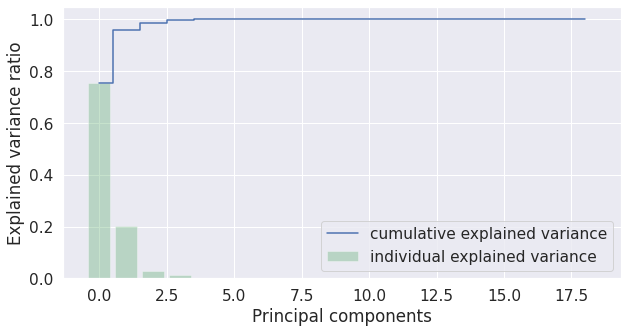

Cumulative explained ratio: [0.75639126 0.95801733 0.98540763 0.99964793 0.99978269 0.99982495
 0.99985342 0.99988074 0.99990481 0.99992416 0.99993859 0.99994975
 0.99995992 0.99996903 0.9999771  0.99998404 0.99999001 0.99999546
 1.        ]


In [ ]:
# Visualisasi Data Original PCA 
cum_var_ratio = np.cumsum(var_ratio) 
plt.figure(figsize=(10, 5)) 
plt.bar(range(len(var_ratio)), 
var_ratio, 
alpha=0.3333, 
align='center', 
label='individual explained variance', 
color = 'g') 
plt.step(range(len(cum_var_ratio)), 
cum_var_ratio, 
where='mid', 
label='cumulative explained variance') 
plt.ylabel('Explained variance ratio') 
plt.xlabel('Principal components') 
plt.legend(loc='best') 
plt.show() 
print("Cumulative explained ratio:",cum_var_ratio)


In [ ]:
# Dipilih 18 PC 
pca = PCA(n_components=18, random_state=2022) 
pca.fit(X) 
ori_pca_array = pca.transform(X) 
ori_pca = pd.DataFrame(data=ori_pca_array, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18']) 


In [ ]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(ori_pca,y, test_size=0.3, random_state=2022) 


In [ ]:
pca = PCA(random_state=2022) 
pca.fit(X_norm) 
norm_pca_array = pca.transform(X_norm) 
norm_pca = pd.DataFrame(norm_pca_array) 
print("Heads of iris_pca:",norm_pca.head()) 
var_ratio = pca.explained_variance_ratio_ 
print("\n Explained variance ratio:",var_ratio) 
sv = pca.singular_values_ 
print("\n Singular Value:",sv) 


Heads of iris_pca:          0         1         2         3         4         5         6   \
0 -1.895595  1.621352 -0.501163 -0.153212  0.176635  1.659710 -1.657174   
1 -0.477798  1.267833 -0.254832 -1.126155  0.275712 -0.693623 -1.011173   
2 -1.090697 -0.473097  0.012668 -1.828578  0.382059 -0.347054  1.178633   
3 -3.044841 -0.428505  0.259024  0.085812 -1.206058  0.324624  0.944460   
4 -1.925182 -1.144302 -0.011571  0.720511  1.277375 -0.078406  0.609376   

         7         8         9         10        11        12        13  \
0  0.111295  0.120208 -0.310161  2.629895 -1.086091 -0.350524 -0.507154   
1  0.102702 -0.738911  0.282129  0.191191 -1.536781  0.755189 -0.394859   
2 -1.902332 -1.185417  0.244891 -0.617183 -0.505393  1.297717 -0.469368   
3  0.642219  0.798147  0.933300 -0.357623  0.603960 -0.645554 -0.360678   
4  0.320288 -0.119101  0.041483  0.000750 -0.564704 -0.451871  0.079541   

         14        15        16        17        18  
0  0.053782 -0.822844  0.

In [ ]:
# Visualisasi Data Normalisasi PCA 
cum_var_ratio = np.cumsum(var_ratio) 


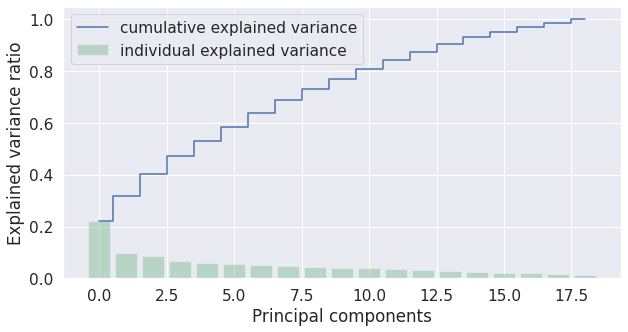

In [ ]:
plt.figure(figsize=(10, 5)) 
plt.bar(range(len(var_ratio)), 
var_ratio, 
alpha=0.3333, 
align='center', 
label='individual explained variance', 
color = 'g') 
plt.step(range(len(cum_var_ratio)), 
cum_var_ratio, 
where='mid', 
label='cumulative explained variance') 
plt.ylabel('Explained variance ratio') 
plt.xlabel('Principal components') 
plt.legend(loc='best') 
plt.show() 


In [ ]:
print("Cumulative explained ratio:",cum_var_ratio)


Cumulative explained ratio: [0.22028193 0.31687502 0.40477632 0.47113501 0.5296738  0.58543778
 0.63796522 0.6873126  0.73041193 0.77041107 0.8093397  0.84382454
 0.87556989 0.90473528 0.93072642 0.95194209 0.97112982 0.98662004
 1.        ]


In [ ]:
# Dipilih 18 PC 
pca = PCA(n_components=18, random_state=2022) 
pca.fit(X_norm) 
norm_pca_array = pca.transform(X_norm) 
norm_pca = pd.DataFrame(data=norm_pca_array, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18']) 



In [ ]:
X_train_norm_pca, X_test_norm_pca, Y_train_norm_pca, Y_test_norm_pca = train_test_split(norm_pca,y, test_size=0.3, random_state=2022) 


In [ ]:
# menyiapkan parameter yang digunakan 
parameters_dt = { 
"model__max_depth": np.arange(1,21), 
"model__min_samples_leaf": np.arange(1,101,2), 
"model__min_samples_split": np.arange(2,11), 
"model__criterion": ['gini','entropy'], 
"model__random_state": [2022] 
} 


In [ ]:
# Pemodelan Decision Tree 
classifier_dt_pipeline = Pipeline([ 
('model',DecisionTreeClassifier()), 
]) 


In [ ]:
ori_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1) 

In [ ]:
ori_classifier_dt.fit(X_train,Y_train.ravel()) 

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [2022]})

In [ ]:
ori_classifier_dt.best_estimator_ 

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=5, random_state=2022))])

In [ ]:
for param_name in sorted(parameters_dt.keys()): 
  print('%s: %r' %(param_name,ori_classifier_dt.best_params_[param_name]))


model__criterion: 'gini'
model__max_depth: 5
model__min_samples_leaf: 1
model__min_samples_split: 2
model__random_state: 2022


In [ ]:
norm_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1) 

In [ ]:
norm_classifier_dt.fit(X_train_norm,Y_train_norm.ravel()) 


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [2022]})

In [ ]:
norm_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=5, random_state=2022))])

In [ ]:
for param_name in sorted(parameters_dt.keys()): 
  print('%s: %r' %(param_name,norm_classifier_dt.best_params_[param_name]))


model__criterion: 'gini'
model__max_depth: 5
model__min_samples_leaf: 1
model__min_samples_split: 2
model__random_state: 2022


In [ ]:
ori_pca_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1) 


In [ ]:
ori_pca_classifier_dt.fit(X_train_pca,Y_train_pca.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [2022]})

In [ ]:
ori_pca_classifier_dt.best_estimator_ 


Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=5, min_samples_split=3,
                                        random_state=2022))])

In [ ]:
for param_name in sorted(parameters_dt.keys()): 
  print('%s: %r' %(param_name,ori_pca_classifier_dt.best_params_[param_name])) 


model__criterion: 'gini'
model__max_depth: 5
model__min_samples_leaf: 1
model__min_samples_split: 3
model__random_state: 2022


In [ ]:
norm_pca_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [ ]:
norm_pca_classifier_dt.fit(X_train_norm_pca,Y_train_norm_pca.ravel()) 


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [2022]})

In [ ]:
norm_pca_classifier_dt.best_estimator_ 


Pipeline(steps=[('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                        random_state=2022))])

In [ ]:
for param_name in sorted(parameters_dt.keys()): 
  print('%s: %r' %(param_name,norm_pca_classifier_dt.best_params_[param_name])) 


model__criterion: 'entropy'
model__max_depth: 4
model__min_samples_leaf: 1
model__min_samples_split: 2
model__random_state: 2022


In [ ]:
ori_y_pred_dt_train = ori_classifier_dt.predict(X_train)

In [ ]:
ori_accuracy_dt_train = accuracy_score(Y_train,ori_y_pred_dt_train) 
print('Akurasi pada training set: ', ori_accuracy_dt_train) 


Akurasi pada training set:  0.9814814814814815


In [ ]:
ori_precision_dt_train = precision_score(Y_train,ori_y_pred_dt_train, average='micro') 
print('Precision pada training set: ', ori_precision_dt_train) 


Precision pada training set:  0.9814814814814815


In [ ]:
ori_recall_dt_train = recall_score(Y_train,ori_y_pred_dt_train, average='micro') 
print('Recall pada training set: ', ori_recall_dt_train) 


Recall pada training set:  0.9814814814814815


In [ ]:
ori_y_pred_dt_test = ori_classifier_dt.predict(X_test) 

In [ ]:
ori_accuracy_dt_test = accuracy_score(Y_test,ori_y_pred_dt_test) 
print('Akurasi pada test set: ', ori_accuracy_dt_test) 


Akurasi pada test set:  0.7659574468085106


In [ ]:
ori_precision_dt_test = precision_score(Y_test,ori_y_pred_dt_test, average='micro') 
print('Precision pada test set: ', ori_precision_dt_test) 


Precision pada test set:  0.7659574468085106


In [ ]:
ori_recall_dt_test = recall_score(Y_test,ori_y_pred_dt_test, average='micro') 
print('Recall pada test set: ', ori_recall_dt_test) 


Recall pada test set:  0.7659574468085106


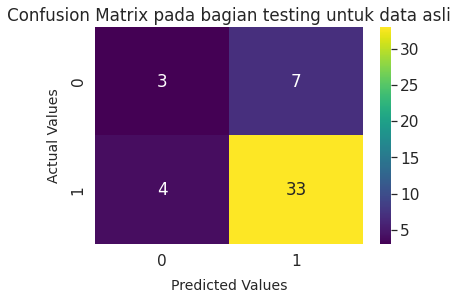

In [ ]:
# Visualisasi Confusion Matrix dengan Seaborn 
sns.heatmap(confusion_matrix(Y_test,ori_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f') 
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10) 
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10) 
plt.title('Confusion Matrix pada bagian testing untuk data asli') 
plt.show()


In [ ]:
norm_y_pred_dt_train = norm_classifier_dt.predict(X_train_norm) 

In [ ]:
norm_accuracy_dt_train = accuracy_score(Y_train_norm,norm_y_pred_dt_train) 
print('Akurasi pada training set: ', norm_accuracy_dt_train) 


Akurasi pada training set:  0.9814814814814815


In [ ]:
norm_precision_dt_train = precision_score(Y_train_norm,norm_y_pred_dt_train, average='micro') 
print('Precision pada training set: ', norm_precision_dt_train) 


Precision pada training set:  0.9814814814814815


In [ ]:
norm_recall_dt_train = recall_score(Y_train_norm,norm_y_pred_dt_train, average='micro') 
print('Recall pada training set: ', norm_recall_dt_train) 


Recall pada training set:  0.9814814814814815


In [ ]:
norm_y_pred_dt_test = norm_classifier_dt.predict(X_test_norm) 


In [ ]:
norm_accuracy_dt_test = accuracy_score(Y_test_norm,norm_y_pred_dt_test) 
print('Akurasi pada test set: ', norm_accuracy_dt_test) 


Akurasi pada test set:  0.7659574468085106


In [ ]:
norm_precision_dt_test = precision_score(Y_test_norm,norm_y_pred_dt_test, average='micro') 
print('Precision pada test set: ', norm_precision_dt_test) 


Precision pada test set:  0.7659574468085106


In [ ]:
norm_recall_dt_test = recall_score(Y_test_norm,norm_y_pred_dt_test, average='micro') 
print('Recall pada test set: ', norm_recall_dt_test) 


Recall pada test set:  0.7659574468085106


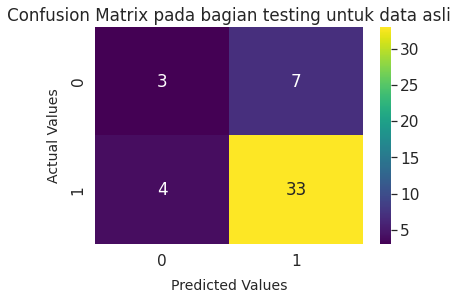

In [ ]:
# Visualisasi Confusion Matrix dengan Seaborn 
sns.heatmap(confusion_matrix(Y_test_norm,norm_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f') 
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10) 
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10) 
plt.title('Confusion Matrix pada bagian testing untuk data asli') 
plt.show() 


In [ ]:
ori_pca_y_pred_dt_train = ori_pca_classifier_dt.predict(X_train_pca) 


In [ ]:
ori_pca_accuracy_dt_train = accuracy_score(Y_train_pca,ori_pca_y_pred_dt_train) 
print('Akurasi pada training set: ', ori_pca_accuracy_dt_train) 


Akurasi pada training set:  0.9722222222222222


In [ ]:
ori_pca_precision_dt_train = precision_score(Y_train_pca,ori_pca_y_pred_dt_train, average='micro') 
print('Precision pada training set: ', ori_pca_precision_dt_train) 


Precision pada training set:  0.9722222222222222


In [ ]:
ori_pca_recall_dt_train = recall_score(Y_train_pca,ori_pca_y_pred_dt_train, average='micro') 
print('Recall pada training set: ', ori_pca_recall_dt_train) 


Recall pada training set:  0.9722222222222222


In [ ]:
ori_pca_y_pred_dt_test = ori_pca_classifier_dt.predict(X_test_pca) 


In [ ]:
ori_pca_accuracy_dt_test = accuracy_score(Y_test_pca,ori_pca_y_pred_dt_test) 
print('Akurasi pada test set: ', ori_pca_accuracy_dt_test) 


Akurasi pada test set:  0.8085106382978723


In [ ]:
ori_pca_precision_dt_test = precision_score(Y_test_pca,ori_pca_y_pred_dt_test, average='micro') 
print('Precision pada test set: ', ori_pca_precision_dt_test) 


Precision pada test set:  0.8085106382978723


In [ ]:
ori_pca_recall_dt_test = recall_score(Y_test_pca,ori_pca_y_pred_dt_test, average='micro') 
print('Recall pada test set: ', ori_pca_recall_dt_test) 


Recall pada test set:  0.8085106382978723


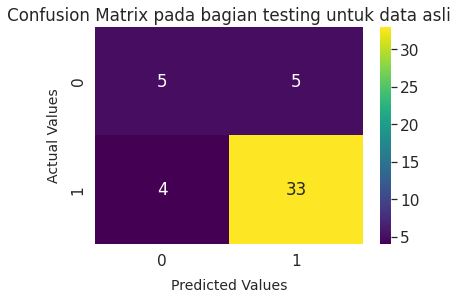

In [ ]:
# Visualisasi Confusion Matrix dengan Seaborn 
sns.heatmap(confusion_matrix(Y_test_pca,ori_pca_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f') 
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10) 
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10) 
plt.title('Confusion Matrix pada bagian testing untuk data asli') 
plt.show() 


In [ ]:
norm_pca_y_pred_dt_train = norm_pca_classifier_dt.predict(X_train_norm_pca) 

In [ ]:
norm_pca_accuracy_dt_train = accuracy_score(Y_train_norm_pca,norm_pca_y_pred_dt_train) 
print('Akurasi pada training set: ', norm_pca_accuracy_dt_train) 


Akurasi pada training set:  0.9814814814814815


In [ ]:
norm_pca_precision_dt_train = precision_score(Y_train_norm_pca,norm_pca_y_pred_dt_train, average='micro') 
print('Precision pada training set: ', norm_pca_precision_dt_train) 


Precision pada training set:  0.9814814814814815


In [ ]:
norm_pca_recall_dt_train = recall_score(Y_train_norm_pca,norm_pca_y_pred_dt_train, average='micro') 
print('Recall pada training set: ', norm_pca_recall_dt_train) 


Recall pada training set:  0.9814814814814815


In [ ]:
norm_pca_y_pred_dt_test = norm_pca_classifier_dt.predict(X_test_norm_pca) 


In [ ]:
norm_pca_accuracy_dt_test = accuracy_score(Y_test_norm_pca,norm_pca_y_pred_dt_test) 
print('Akurasi pada test set: ', norm_pca_accuracy_dt_test) 


Akurasi pada test set:  0.7659574468085106


In [ ]:
norm_pca_precision_dt_test = precision_score(Y_test_norm_pca,norm_pca_y_pred_dt_test, average='micro') 
print('Precision pada test set: ', norm_pca_precision_dt_test) 


Precision pada test set:  0.7659574468085106


In [ ]:
norm_pca_recall_dt_test = recall_score(Y_test_norm_pca,norm_pca_y_pred_dt_test, average='micro') 
print('Recall pada test set: ', norm_pca_recall_dt_test)


Recall pada test set:  0.7659574468085106


In [ ]:
models = [ 
    ('Decision Tree Data Original', ori_accuracy_dt_train, ori_accuracy_dt_test), 
    ('Decision Tree Data Normalisasi', norm_accuracy_dt_train, norm_accuracy_dt_test), 
    ('Decision Tree PCA Data Original', ori_pca_accuracy_dt_train, ori_pca_accuracy_dt_test), 
    ('Decision Tree PCA Data Normalisasi', norm_pca_accuracy_dt_train, norm_pca_accuracy_dt_test), 
    ]


In [ ]:
# Melakukan perbandingan hasil training akurasi dan test akurasi dengan 4 model 
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy']) 
predict 


,Model,Training Accuracy,Test Accuracy
0,Decision Tree Data Original,0.981481,0.765957
1,Decision Tree Data Normalisasi,0.981481,0.765957
2,Decision Tree PCA Data Original,0.972222,0.808511
3,Decision Tree PCA Data Normalisasi,0.981481,0.765957


In [ ]:
models_comparison = [
('Decision Tree Data Original', ori_accuracy_dt_test, ori_recall_dt_test, ori_precision_dt_test),
('Decision Tree Data Normalisasi', norm_accuracy_dt_test, norm_recall_dt_test, norm_precision_dt_test),
('Decision Tree PCA Data Original', ori_pca_accuracy_dt_test, ori_pca_recall_dt_test, ori_pca_precision_dt_test),
('Decision Tree PCA Data Normalisasi', norm_pca_accuracy_dt_test, norm_pca_recall_dt_test, norm_pca_precision_dt_test),
]

In [ ]:
# Melakukan perbandingan hasil Akurasi, Presisi dan Recall pada data Testing dengan 4 model
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Decision Tree Data Original,0.765957,0.765957,0.765957
1,Decision Tree Data Normalisasi,0.765957,0.765957,0.765957
2,Decision Tree PCA Data Original,0.808511,0.808511,0.808511
3,Decision Tree PCA Data Normalisasi,0.765957,0.765957,0.765957


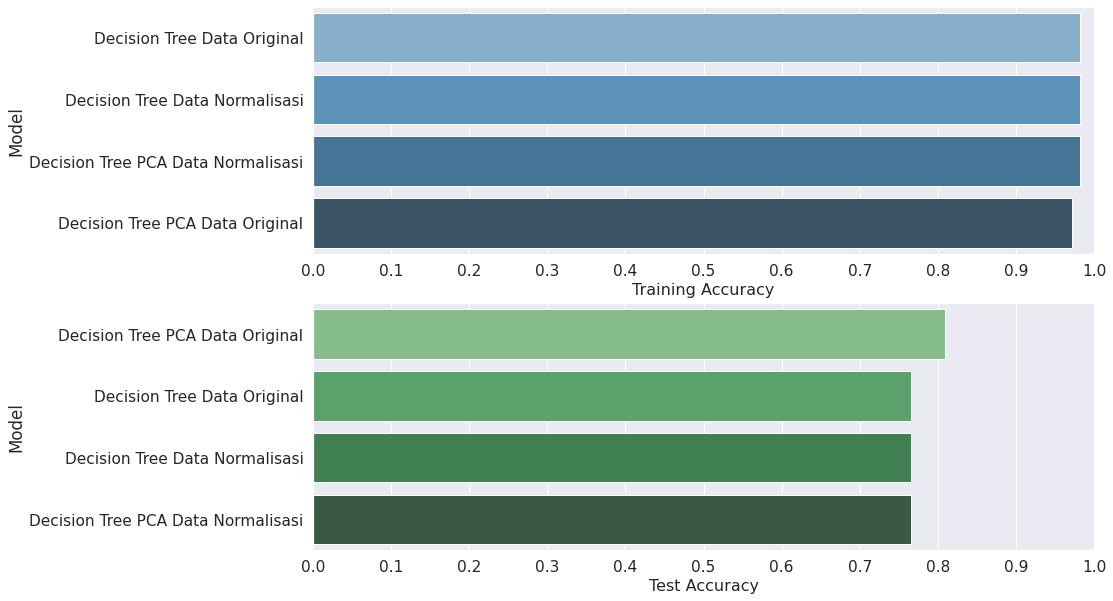

In [ ]:
# Visualisasi Perbandingan 4 model dengan Seaborn
f, axes = plt.subplots(2,1, figsize=(14,10))
predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)
sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))
predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)
sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))
plt.show()
